In [49]:
from __future__ import print_function

import LogicalRegression
from pprint import pprint
from time import time
import logging
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm,metrics,model_selection
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import linear_model

In [47]:
def logistic_regression(sample_size,data_df):

    result = dict()
    result_time = dict()

    sample_df = data_df.sample(sample_size)
    train, test = train_test_split(sample_df, test_size = 0.3)
    print("training:%d -  testing: %d \n"%(len(train),len(test)))


    # In[25]:

    training_data = train.data
    training_label = train.category
    testing_data = test.data
    testing_label = test.category


    # ## Fitting tf-idf model

    # In[26]:

    t0 = time()
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.75,binary= False,smooth_idf = False)
    vectorizer.fit(training_data)
    print("tf-idf learning time:", time() - t0)
    result_time['tf_idf'] = time() - t0

    # In[27]:

    result['vectorizer'] = vectorizer


    # ## Extracting features for training and testing data

    # In[28]:

    t0 = time()
    training_matrix = vectorizer.transform(training_data)
    testing_matrix = vectorizer.transform(testing_data)
    print("feature extraction time of training and testing dataset:", time() - t0)
    result_time['feature_extraction'] = time() - t0

    # In[29]:

    print('training',training_matrix.shape)
    print('testing',testing_matrix.shape)
    shape = training_matrix.shape


    result['vector_size'] = shape[1]


    # ## Classification by Logistic Regression of Scikit Learn


    t0 = time()
    logreg = linear_model.LogisticRegression(C=100000.0,penalty = 'l2')
    logreg.fit(training_matrix,training_label)
    print('Logistic Regression time:',time()-t0)
    result_time['training_classifer'] = time() - t0

    t0 = time()
    predicted_result = logreg.predict(testing_matrix)
    print("testing time:", time()-t0)
    result_time['test_classifier'] = time() - t0

    print(metrics.classification_report(testing_label, predicted_result))
    result['time_consume'] = result_time
    precision = np.mean(metrics.precision_recall_fscore_support(testing_label, predicted_result)[0])
    recall = np.mean(metrics.precision_recall_fscore_support(testing_label, predicted_result)[1])
    fscore = np.mean(metrics.precision_recall_fscore_support(testing_label, predicted_result)[2])
    result['precision'] = precision
    result['recall'] = recall
    result['fscore'] = fscore
    return result

In [54]:
precision

'%r'

In [50]:
dir_path = os.path.join(os.getcwd(), 'vnexpress')
categories = list()

data = list()
for directory in os.listdir(dir_path):
#     print(directory)
    if '.' not in directory:
        list_file_path = os.path.join(dir_path, directory)
        count = 0
        for file_name in os.listdir(list_file_path):
            data_dict = dict()
            data_dict['file_name'] = file_name
            data_dict['category'] = directory
            file_path = os.path.join(list_file_path, file_name)
            file = open(file_path,'r')
            data_dict['data'] = file.read()
            data.append(data_dict)
data_df = pd.DataFrame(data)
sample_df = data_df.sample(10000)
train, test = train_test_split(sample_df, test_size = 0.3)

In [52]:
len(data_df)

47487

### Apply best parameter for full dataset 47487 documents:
33240 for training (70%) -  14247 for testing (30%)

In [51]:
alldataset = logistic_regression(len(data_df),data_df)

training:33240 -  testing: 14247 

tf-idf learning time: 15.136435985565186
feature extraction time of training and testing dataset: 20.915369987487793
training (33240, 137163)
testing (14247, 137163)
Logistic Regression time: 35.1395959854126
testing time: 0.04875898361206055
             precision    recall  f1-score   support

     dulich       0.95      0.96      0.95      1211
    giaitri       0.98      0.99      0.99      1357
    giaoduc       0.97      0.96      0.96      1241
    khoahoc       0.96      0.96      0.96      1323
  kinhdoanh       0.96      0.95      0.95      1422
   otoxemay       0.99      0.98      0.98      1313
   phapluat       0.97      0.96      0.96      1322
      sohoa       0.97      0.97      0.97      1215
    thegioi       0.96      0.97      0.97      1384
    thethao       1.00      1.00      1.00      1311
     thoisu       0.91      0.92      0.91      1148

avg / total       0.97      0.97      0.97     14247



## Changing the number of training documents

In [7]:
result_list = list()
for sample_size in [1000,5000,10000,15000,20000,25000,30000,35000,40000,45000]:
    result = logistic_regression(sample_size,data_df)
    result_list.append(result)
    print(result)

training:700 -  testing: 300 

tf-idf learning time: 0.4011969566345215
feature extraction time of training and testing dataset: 0.402432918548584
training (700, 16402)
testing (300, 16402)
Logistic Regression time: 0.29755091667175293
testing time: 0.00964212417602539
             precision    recall  f1-score   support

     dulich       0.75      0.79      0.77        19
    giaitri       0.90      0.95      0.92        19
    giaoduc       1.00      0.97      0.99        34
    khoahoc       0.97      0.91      0.94        35
  kinhdoanh       0.72      0.82      0.77        28
   otoxemay       0.90      0.96      0.93        27
   phapluat       0.77      0.95      0.85        21
      sohoa       0.86      0.82      0.84        22
    thegioi       0.90      0.90      0.90        29
    thethao       1.00      0.97      0.98        30
     thoisu       0.79      0.61      0.69        36

avg / total       0.88      0.87      0.87       300

{'time_consume': {'tf_idf': 0.40127205

In [8]:
result_df = pd.DataFrame(result_list)

In [9]:
result_df.to_csv('numberofDoc.csv')

In [20]:
numbOfDoc =[1000,5000,10000,15000,20000,25000,30000,35000,40000,45000]
trainDoc = [int(x * 0.7) for x in numbOfDoc]

In [21]:
trainDoc

[700, 3500, 7000, 10500, 14000, 17500, 21000, 24500, 28000, 31499]

In [10]:
result_df

,fscore,precision,recall,time_consume,vector_size,vectorizer
0,0.869925,0.867603,0.877364,"{'tf_idf': 0.4012720584869385, 'training_class...",16402,"TfidfVectorizer(analyzer='word', binary=False,..."
1,0.919275,0.919788,0.919641,"{'tf_idf': 1.316298007965088, 'training_classi...",38454,"TfidfVectorizer(analyzer='word', binary=False,..."
2,0.947020,0.947121,0.947232,"{'tf_idf': 2.9751429557800293, 'training_class...",56637,"TfidfVectorizer(analyzer='word', binary=False,..."
3,0.954196,0.954370,0.954196,"{'tf_idf': 4.037225961685181, 'training_classi...",70714,"TfidfVectorizer(analyzer='word', binary=False,..."
4,0.953676,0.953863,0.953581,"{'tf_idf': 5.636569976806641, 'training_classi...",83521,"TfidfVectorizer(analyzer='word', binary=False,..."
5,0.960024,0.960055,0.960082,"{'tf_idf': 5.900888919830322, 'training_classi...",95099,"TfidfVectorizer(analyzer='word', binary=False,..."
6,0.955624,0.955665,0.955619,"{'tf_idf': 7.485641002655029, 'training_classi...",105059,"TfidfVectorizer(analyzer='word', binary=False,..."
7,0.962858,0.962935,0.962809,"{'tf_idf': 8.768892765045166, 'training_classi...",115774,"TfidfVectorizer(analyzer='word', binary=False,..."
8,0.960052,0.960012,0.960127,"{'tf_idf': 11.76259994506836, 'training_classi...",125187,"TfidfVectorizer(analyzer='word', binary=False,..."
9,0.965240,0.965292,0.965219,"{'tf_idf': 10.807564973831177, 'training_class...",133380,"TfidfVectorizer(analyzer='word', binary=False,..."


/Users/vunguyen/anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


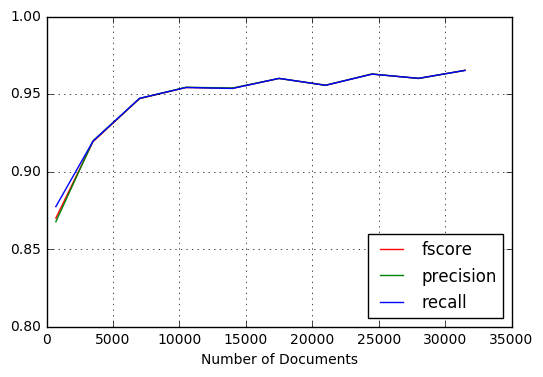

In [32]:
plt.gca().set_color_cycle(['red', 'green', 'blue'])

plt.plot(trainDoc, result_df['fscore'])
plt.plot(trainDoc, result_df['precision'])
plt.plot(trainDoc, result_df['recall'])
plt.axis([0, 35000, 0.8, 1.0])
plt.legend(['fscore', 'precision', 'recall'], loc='lower right')
plt.xlabel('Number of Documents')
plt.grid(True)
plt.show()

In [63]:

result = dict()
result_time = dict()

sample_df = data_df
train, test = train_test_split(sample_df, test_size = 0.3)
print("training:%d -  testing: %d \n"%(len(train),len(test)))


# In[25]:

training_data = train.data
training_label = train.category
testing_data = test.data
testing_label = test.category


# ## Fitting tf-idf model

# In[26]:

t0 = time()
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.75,binary= False,smooth_idf = False)
vectorizer.fit(training_data)
print("tf-idf learning time:", time() - t0)
result_time['tf_idf'] = time() - t0

# In[27]:

result['vectorizer'] = vectorizer


# ## Extracting features for training and testing data

# In[28]:

t0 = time()
training_matrix = vectorizer.transform(training_data)
testing_matrix = vectorizer.transform(testing_data)
print("feature extraction time of training and testing dataset:", time() - t0)
result_time['feature_extraction'] = time() - t0

# In[29]:

print('training',training_matrix.shape)
print('testing',testing_matrix.shape)
shape = training_matrix.shape


result['vector_size'] = shape[1]


# ## Classification by Logistic Regression of Scikit Learn


t0 = time()
logreg = linear_model.LogisticRegression(C=100000.0,penalty = 'l2')
logreg.fit(training_matrix,training_label)
print('Logistic Regression time:',time()-t0)
result_time['training_classifer'] = time() - t0

t0 = time()
predicted_result = logreg.predict(testing_matrix)
print("testing time:", time()-t0)
result_time['test_classifier'] = time() - t0

print(metrics.classification_report(testing_label, predicted_result))
result['time_consume'] = result_time
precision = np.mean(metrics.precision_recall_fscore_support(testing_label, predicted_result)[0])
recall = np.mean(metrics.precision_recall_fscore_support(testing_label, predicted_result)[1])
fscore = np.mean(metrics.precision_recall_fscore_support(testing_label, predicted_result)[2])
result['precision'] = precision
result['recall'] = recall
result['fscore'] = fscore

training:33240 -  testing: 14247 

tf-idf learning time: 11.146639108657837
feature extraction time of training and testing dataset: 16.268004894256592
training (33240, 137312)
testing (14247, 137312)
Logistic Regression time: 27.296173095703125
testing time: 0.05086803436279297
             precision    recall  f1-score   support

     dulich       0.96      0.95      0.95      1176
    giaitri       0.98      0.99      0.99      1375
    giaoduc       0.95      0.96      0.96      1217
    khoahoc       0.96      0.96      0.96      1324
  kinhdoanh       0.95      0.95      0.95      1304
   otoxemay       0.99      0.98      0.98      1323
   phapluat       0.97      0.96      0.96      1386
      sohoa       0.97      0.97      0.97      1231
    thegioi       0.96      0.97      0.97      1315
    thethao       1.00      1.00      1.00      1394
     thoisu       0.92      0.93      0.92      1202

avg / total       0.97      0.97      0.97     14247



In [64]:
from sklearn.metrics import accuracy_score
# import sklearn.metrics.accuracy_score
# sklearn.metrics.accuracy_score(testing_label, predicted_result)
accuracy_score(testing_label, predicted_result)

0.96553660419737486

In [65]:
metrics.precision_recall_fscore_support(testing_label, predicted_result)

(array([ 0.9554413 ,  0.98129496,  0.9512987 ,  0.96273764,  0.94736842,
         0.98709188,  0.97424577,  0.97242498,  0.96431283,  0.99856219,
         0.91769547]),
 array([ 0.94812925,  0.992     ,  0.96302383,  0.95619335,  0.95245399,
         0.98261527,  0.95526696,  0.97400487,  0.96577947,  0.9964132 ,
         0.92762063]),
 array([ 0.95177123,  0.98661844,  0.95712536,  0.95945434,  0.9499044 ,
         0.98484848,  0.96466302,  0.97321429,  0.96504559,  0.99748654,
         0.92263136]),
 array([1176, 1375, 1217, 1324, 1304, 1323, 1386, 1231, 1315, 1394, 1202]))